In [1]:
import pandas as pd
train=pd.read_csv("C:\\Users\\swetha.b\\Downloads\\twitter_sentiment_analysis\\train_E6oV3lV.csv")
test=pd.read_csv("C:\\Users\\swetha.b\\Downloads\\twitter_sentiment_analysis\\test_tweets_anuFYb8.csv")

In [2]:
train.head(3)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty


In [3]:
test.head(3)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...


In [4]:
import re
import string
import nltk
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

combining both test and train data as same functions are to be performed

In [5]:
combi=train.append(test,ignore_index=True)

In [6]:
combi.head(5)

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [7]:
combi.tail(5)

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


DATA PREPROCESSING


A)removing @ user

In [8]:
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for i in r:
        input_txt=re.sub(i,' ',input_txt)

    return input_txt

In [9]:
#creating a column called tidy tweet
import numpy as np
combi['tidy_tweet']=np.vectorize(remove_pattern)(combi['tweet'],"@[\w]*")

In [10]:
combi.head(3)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so se...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause ...
2,3,0.0,bihday your majesty,bihday your majesty


B) remove punctuations,numbers and special characters

In [11]:
combi['tidy_tweet']=combi['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")

c:\Users\swetha.b\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [12]:
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so se...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause ...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


C)remove short words

In [13]:
combi['tidy_tweet']=combi['tidy_tweet'].apply((lambda x:' '.join((w for w in x.split() if len(w)>3))))

In [14]:
combi.head(15)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos disp...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,next school year year exams think about that #...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here


D) tokenization

In [15]:
token_text=combi['tidy_tweet'].apply(lambda x: x.split())

In [16]:
token_text.head(3)

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
Name: tidy_tweet, dtype: object

E) stemming

In [17]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

token_text=token_text.apply(lambda x:[stemmer.stem(i) for i in x])
token_text.head(5)

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

joining the tokens together

In [18]:
for i in range(len(token_text)):
    token_text[i]=' '.join(token_text[i])
combi['tidy_tweet']=token_text

In [19]:
combi.head(3)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti


3)story telling and visualization

A)understand common words

In [20]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


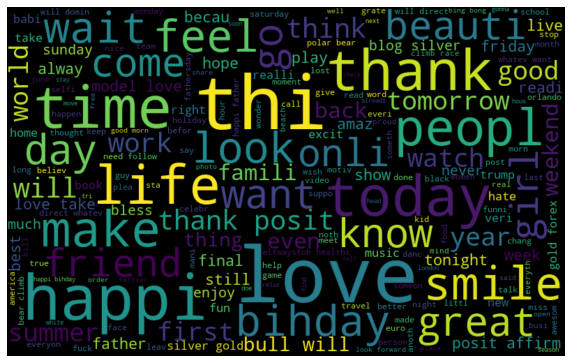

In [21]:
all_words=' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()


words like life,thank,people,smile,great,happi are mostly used, We can assume that most words are positive in nature

B) To find the words in non racist/sexiest tweets

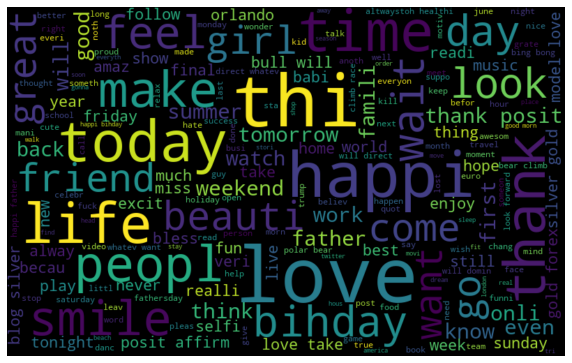

In [22]:
positive_words=' '.join([text for text in combi['tidy_tweet'][combi['label']==0]])

wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(positive_words)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

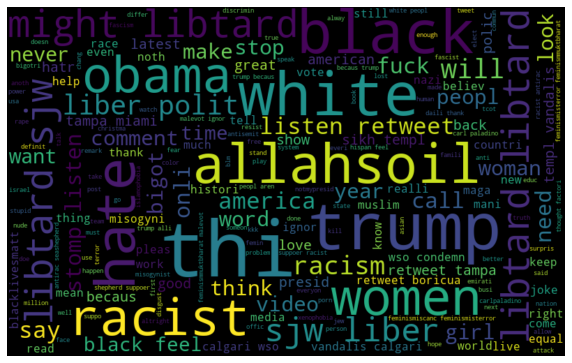

In [23]:
negative_words=' '.join([text for text in combi['tidy_tweet'][combi['label']==1]])

wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

D) Impact of hashtags

In [24]:
def hashtag_extract(x):
    hashtags=[]
    for i in x:
        ht=re.findall(r"#(\w+)",i)
        hashtags.append(ht)

    return hashtags

In [25]:
ht_positive=hashtag_extract(combi['tidy_tweet'][combi['label']==0])
ht_negative=hashtag_extract(combi['tidy_tweet'][combi["label"]==1])
ht_positive=sum(ht_positive,[])
ht_negative=sum(ht_negative,[])

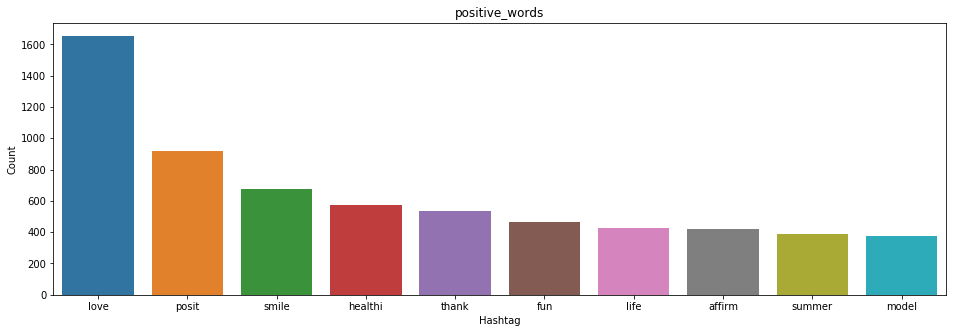

In [26]:
a=nltk.FreqDist(ht_positive)
d=pd.DataFrame({'Hashtag':list(a.keys()),
                'Count':list(a.values())})
d=d.nlargest(columns="Count",n=10)
plt.figure(figsize=(16,5))
import seaborn as sns
ax=sns.barplot(data=d,x="Hashtag",y='Count')
ax.set(ylabel='Count')
plt.title("positive_words")
plt.show()

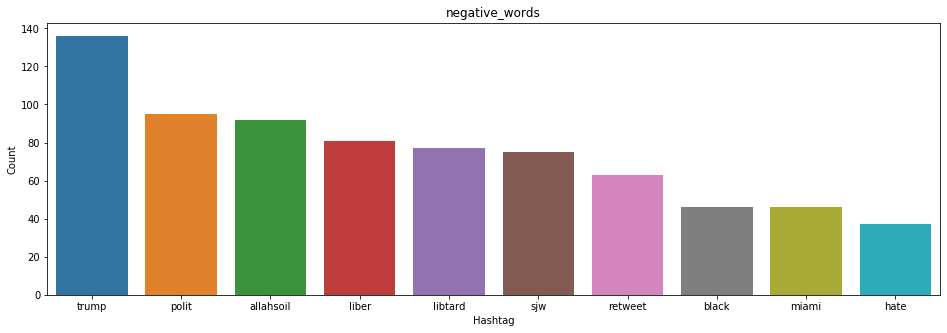

In [27]:
b=nltk.FreqDist(ht_negative)
e=pd.DataFrame({'Hashtag':list(b.keys()),
                'Count':list(b.values())})
e=e.nlargest(columns="Count",n=10)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=e,x="Hashtag",y='Count')
ax.set(ylabel='Count')
plt.title("negative_words")
plt.show()

4)Extracting features from cleaned tweets

In [28]:
#using bbag of words
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=0.9,min_df=2,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(combi['tidy_tweet'])

In [36]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(max_df=0.9,min_df=2,max_features=1000,stop_words='english')
tfidf=tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

In [39]:
#building the model using bag of words
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow=bow[:31962,:]
test_bow=bow[31962:,:]

xtrain_bow,xvalid_bow,ytrain,yvalid=train_test_split(train_bow,train['label'],random_state=42,test_size=0.3)

lreg=LogisticRegression()
lreg.fit(xtrain_bow,ytrain)

prediction=lreg.predict_proba(xvalid_bow)
prediction_int=prediction[:,1]>=0.3
prediction_int=prediction_int.astype(np.int)

f1_score(yvalid,prediction_int)


0.5303408146300915

In [41]:
#to predict test data
test_pred=lreg.predict_proba(test_bow)
test_pred_int=test_pred[:,1]>=0.3
test_pred_int=test_pred_int.astype(np.int)
test['label']=test_pred_int
submission=test[['id','label']]
submission.to_csv('sub_lreg_bow.csv',index=False)

,id,label
0,31963,0
1,31964,0
2,31965,0
